# Importy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sp

___
# Zadanie 1

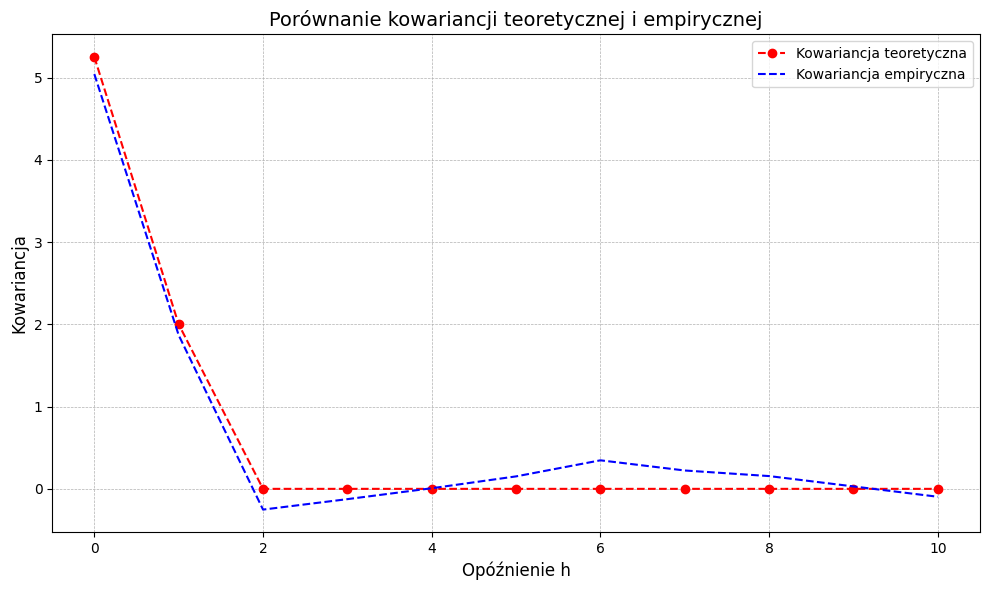

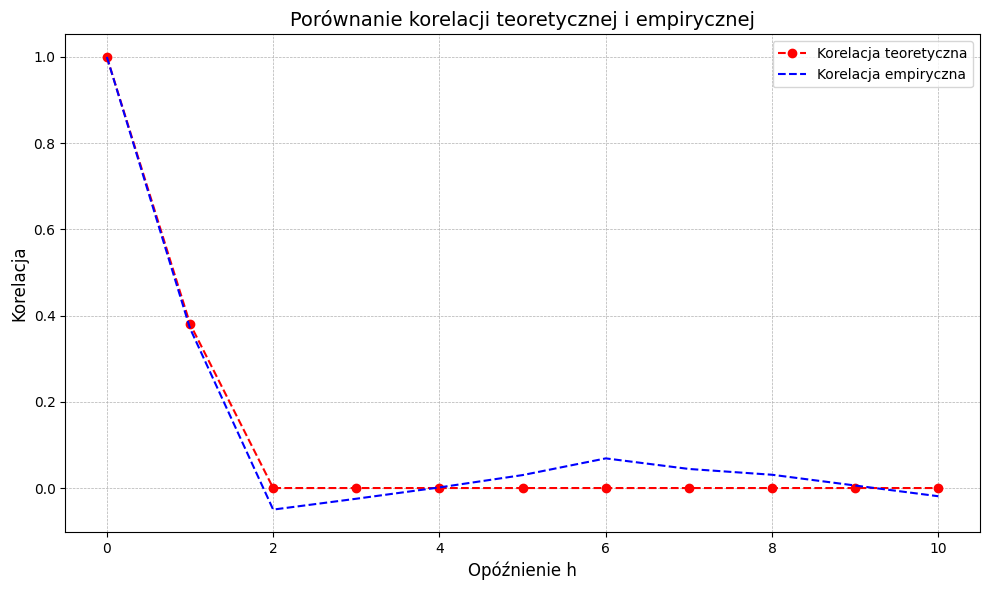

In [15]:
n = 1000
sigma_z = 1
sigma_w = 0.5
h_values = np.arange(0,11)
teta = 2
def kowariancja(h):
    if h == 0:
        return sigma_w**2 + (sigma_z**2)    *(1+teta**2)
    elif h==1 or h == -1:
        return teta * sigma_z**2
    return 0

def korelacja(h):
    if h == 0:
        return 1
    if h == 1 or h == -1:
        return (sigma_z**2 * teta) / (sigma_w**2 + (sigma_z**2)*(1+teta**2))
    return 0

def autokowariancja(h, x_trajectory):
    n = len(x_trajectory)
    x_mean = np.mean(x_trajectory)
 
    x = x_trajectory[:n - h]
    x_h = x_trajectory[h:]
 
    return (1 / n) * np.sum((x - x_mean) * (x_h - x_mean))
 
def autokorelacja(h, x_trajectory):
    return autokowariancja(h, x_trajectory) / autokowariancja(0, x_trajectory)

z_trajectory = np.random.normal(loc=0, scale=sigma_z, size=n)
w_trajectory = np.random.normal(loc=0, scale=sigma_w, size=n-1)
x_t = np.zeros(n)
for i in range(1, n):
    x_t[i] = z_trajectory[i] + teta * z_trajectory[i - 1]
x_t = x_t[1:]

y_t = x_t + w_trajectory


teo_kow = np.zeros(len(h_values))
teo_kor = np.zeros(len(h_values))
emp_kow = np.zeros(len(h_values))
emp_kor = np.zeros(len(h_values))
 
for i in range(len(h_values)):
    h = h_values[i]
 
    teo_kow[i] = kowariancja(h)
    teo_kor[i] = korelacja(h)
 
    emp_kow[i] = autokowariancja(h, y_t)
    emp_kor[i] = autokorelacja(h, y_t)


plt.figure(figsize=(10, 6))
plt.plot(h_values, teo_kow, 'o--', color='red', label='Kowariancja teoretyczna')
plt.plot(h_values, emp_kow, '--', color='blue', label='Kowariancja empiryczna')
plt.xlabel('Opóźnienie h', fontsize=12)
plt.ylabel('Kowariancja', fontsize=12)
plt.title('Porównanie kowariancji teoretycznej i empirycznej', fontsize=14)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(h_values, teo_kor, 'o--', color='red', label='Korelacja teoretyczna')
plt.plot(h_values, emp_kor, '--', color='blue', label='Korelacja empiryczna')
plt.xlabel('Opóźnienie h', fontsize=12)
plt.ylabel('Korelacja', fontsize=12)
plt.title('Porównanie korelacji teoretycznej i empirycznej', fontsize=14)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

___
# Zadanie 2

In [4]:
def prosta_regresji_mnk(x, y):
    n = len(x)
    x_mean = sum(x) / n
    y_mean = sum(y) / n
    numerator = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(n))
    denominator = sum((x[i] - x_mean) ** 2 for i in range(n))
    b1 = numerator / denominator
    b0 = y_mean - b1 * x_mean
    return b0, b1

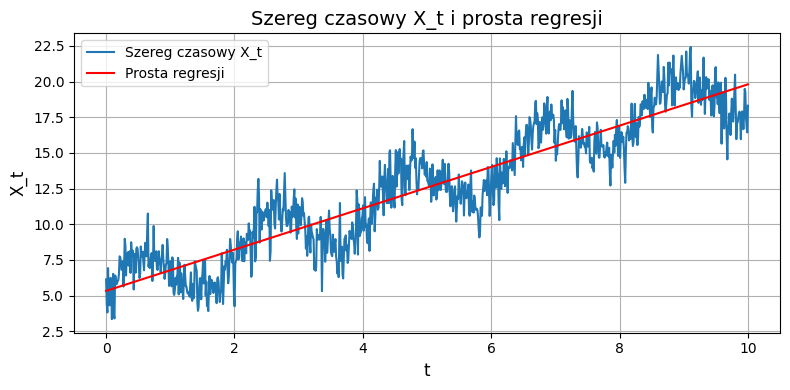

In [5]:
n = 1000
t_values = np.linspace(0,10,n)
a_1 = 1.5
a_2 = 5
b_1 = 2
b_2 = 3
teta = 0.5
sigma = 1
def m(t):
    return a_1 * t + a_2
def s(t,b_1,b_2):
    return b_1 * np.sin(b_2*t)

z_trajectory = np.random.normal(loc=0, scale=sigma, size=n)
y_t = np.zeros(n)
for t in range(n):
    y_t[t] = z_trajectory[t] + teta * z_trajectory[t - 1]
y_t[0] = z_trajectory[0]

X_t = m(t_values) + s(t_values,b_1,b_2) + y_t

a_2_hat, a_1_hat = prosta_regresji_mnk(t_values,X_t)


plt.figure(figsize=(8, 4))
plt.plot(t_values, X_t, label='Szereg czasowy X_t')
plt.plot(t_values, a_1_hat * t_values + a_2_hat, color='red', label='Prosta regresji')
plt.xlabel('t', fontsize=12)
plt.ylabel('X_t', fontsize=12)
plt.title('Szereg czasowy X_t i prosta regresji', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Wyznaczone parametry: b_1_hat = 1.943189083535657, b_2_hat = 3.0026947945663096


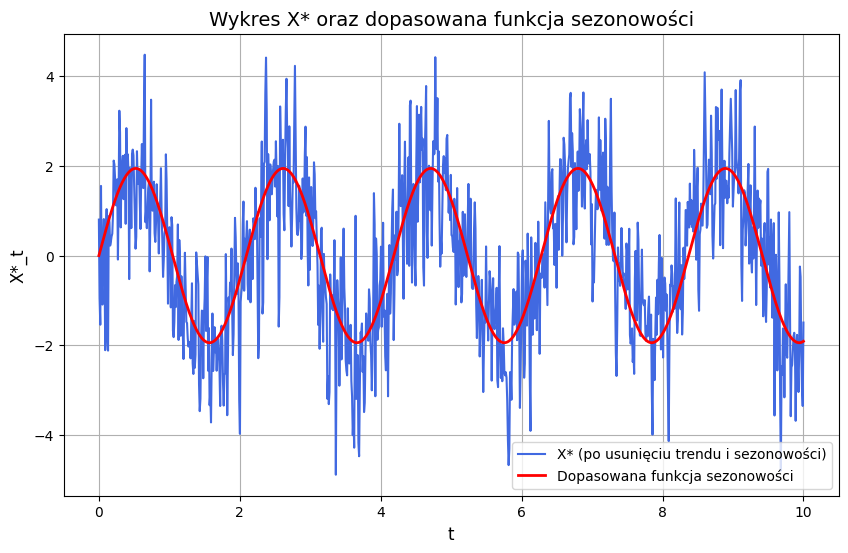

In [12]:
X_star = X_t - a_1_hat * t_values - a_2_hat

params, _ = sp.curve_fit(s, t_values, X_star, p0=[np.max(X_star), np.pi])
b_1_hat, b_2_hat = params
print(f"Wyznaczone parametry: b_1_hat = {b_1_hat}, b_2_hat = {b_2_hat}")
X_double_star = X_star - b_1_hat * np.sin(b_2_hat * t_values)

plt.figure(figsize=(10, 6))
plt.plot(t_values, X_star, label='X* (po usunięciu trendu i sezonowości)', color='royalblue')
plt.plot(t_values, s(t_values, b_1_hat, b_2_hat), color='red', linewidth = 2, label='Dopasowana funkcja sezonowości')
plt.xlabel('t', fontsize=12)
plt.ylabel('X*_t', fontsize=12)
plt.title('Wykres X* oraz dopasowana funkcja sezonowości', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

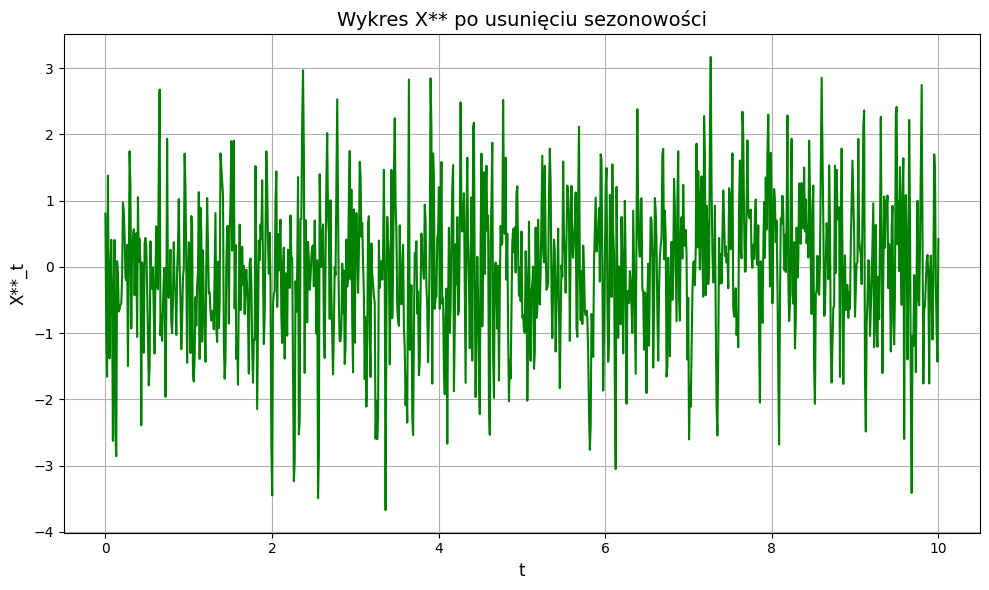

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(t_values, X_double_star, label='X** (po usunięciu funkcji sezonowości)', color='green')
plt.xlabel('t', fontsize=12)
plt.ylabel('X**_t', fontsize=12)
plt.title('Wykres X** po usunięciu sezonowości', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

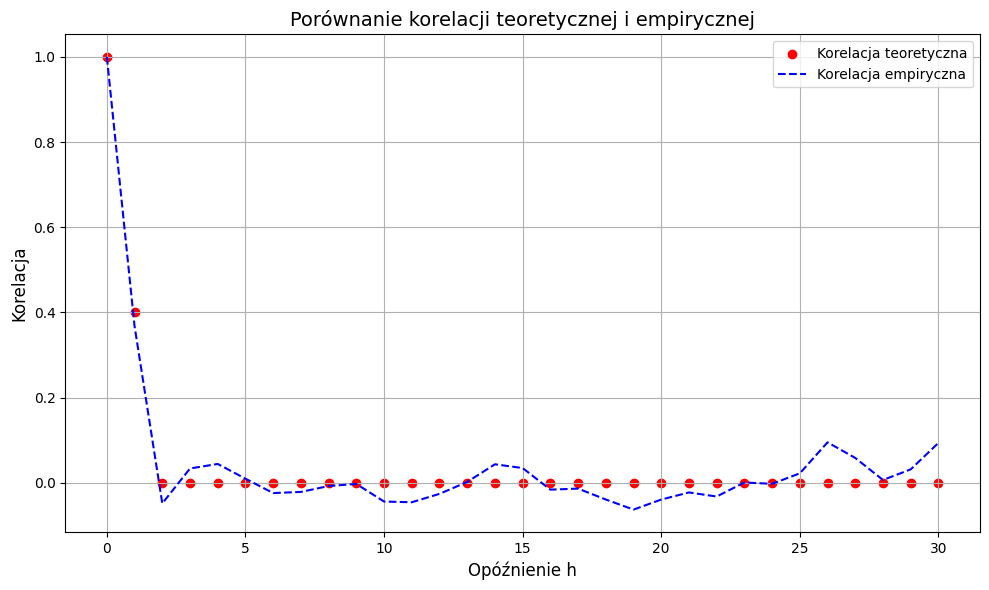

In [14]:
h_values = np.arange(0,31)

def autokowariancja(h, x_trajectory):
    n = len(x_trajectory)
    x_mean = np.mean(x_trajectory)
 
    x = x_trajectory[:n - h]
    x_h = x_trajectory[h:]
 
    return (1 / n) * np.sum((x - x_mean) * (x_h - x_mean))
 
def autokorelacja(h, x_trajectory):
    return autokowariancja(h, x_trajectory) / autokowariancja(0, x_trajectory)

def korelacja(h, theta):
    if h == 0:
        return 1
    if h == 1 or h == -1:
        return theta / (1 + (theta**2))
    return 0

teo_kor = np.zeros(len(h_values))
emp_kor = np.zeros(len(h_values))
 
for i in range(len(h_values)):
    h = h_values[i]

    teo_kor[i] = korelacja(h, teta)
    emp_kor[i] = autokorelacja(h, X_double_star)


plt.figure(figsize=(10, 6))
plt.scatter(h_values, teo_kor, color='red', label='Korelacja teoretyczna')
plt.plot(h_values, emp_kor, color='blue', linestyle='--', label='Korelacja empiryczna')
plt.xlabel('Opóźnienie h', fontsize=12)
plt.ylabel('Korelacja', fontsize=12)
plt.title('Porównanie korelacji teoretycznej i empirycznej', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()